In [4]:
%load_ext autoreload

%autoreload 2

from src import ODE_euler, ajuste_polinomio, ajuste_exponencial, f_lineal_interpolate

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# CONJUNTO DE EJERCICIOS

**3. Utilice el método de Euler para aproximar las soluciones para cada uno de los siguientes problemas de valor inicial.**

**4. Aquí se dan las soluciones reales para los problemas de valor inicial en el ejercicio 3. Calcule el error real en las 
aproximaciones del ejercicio 3.**

**5. Utilice los resultados del ejercicio 3 y la interpolación lineal para aproximar los siguientes valores de $y(t)$. Compare 
las aproximaciones asignadas para los valores reales obtenidos mediante las funciones determinadas en el ejercicio 
4.**

**a.**

$$y' = \frac{y}{t} - (\frac{y}{t})^2$$
$$1 \leq t \leq 2$$
$$y(1) = 1$$
$$h = 0.1$$

**Solución:**

$$y(t) = \frac{t}{1 + \ln(t)}$$


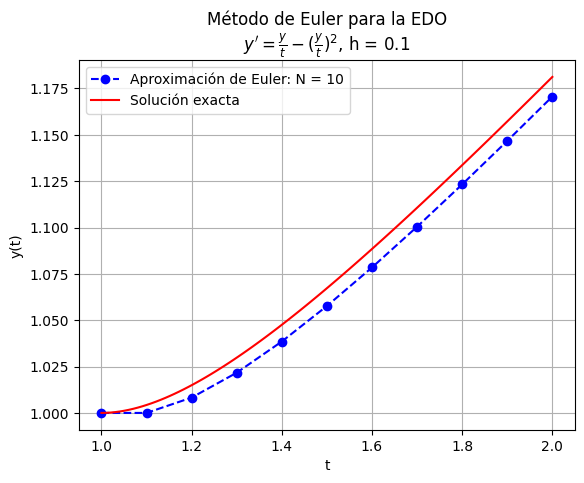

In [6]:
f = lambda t, y: y / t - (y / t) ** 2

exact_sol = lambda t: t / (1 + np.log(t))

a, b = 1, 2
y_t0 = 1
N = 10

ys, ts, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)

t_exact = np.linspace(a, b, 100)
y_exact = exact_sol(t_exact)

plt.plot(
    ts,
    ys,
    label="Aproximación de Euler: N = 10",
    marker="o",
    linestyle="--",
    color="blue",
)
plt.plot(t_exact, y_exact, label="Solución exacta", linestyle="-", color="red")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title(
    "Método de Euler para la EDO\n$y' = \\frac{y}{t} - (\\frac{y}{t})^2$," + f" h = {h}"
)
plt.legend()
plt.grid()
plt.show()

**Error Real**

In [145]:
error = np.abs(exact_sol(ts) - ys)

results = pd.DataFrame(
    {"t_i": ts, "ŷ_i": ys, "y_i = y(t_i)": exact_sol(ts), "|y_i - ŷ_i|": error}
)

print(results)

    t_i       ŷ_i  y_i = y(t_i)  |y_i - ŷ_i|
0   1.0  1.000000      1.000000     0.000000
1   1.1  1.000000      1.004282     0.004282
2   1.2  1.008264      1.014952     0.006688
3   1.3  1.021689      1.029814     0.008124
4   1.4  1.038515      1.047534     0.009019
5   1.5  1.057668      1.067262     0.009594
6   1.6  1.078461      1.088433     0.009972
7   1.7  1.100432      1.110655     0.010223
8   1.8  1.123262      1.133654     0.010392
9   1.9  1.146724      1.157228     0.010505
10  2.0  1.170652      1.181232     0.010581


**Interpolación Lineal**

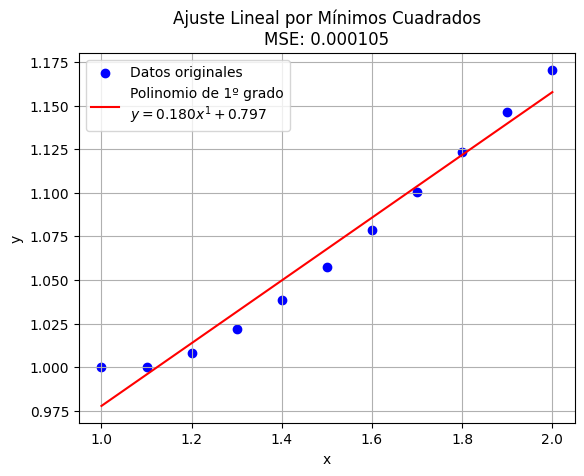

In [146]:
a, b = ajuste_polinomio(ts, ys, 1, 'Lineal')

**1. $y(1.25)$**

In [147]:
x = 1.25

y_exact = exact_sol(x)

y_interpolate = f_lineal_interpolate(a, b, x)

print(f"Valor exacto en x = {x}: y = {y_exact:.6f}")
print(f"Valor interpolado en x = {x}: ŷ = {y_interpolate:.6f}")
print(f"Error absoluto: |y - ŷ| = {abs(y_exact - y_interpolate):.6f}")

Valor exacto en x = 1.25: y = 1.021957
Valor interpolado en x = 1.25: ŷ = 1.022729
Error absoluto: |y - ŷ| = 0.000772


**2. $y(1.93)$**

In [148]:
x = 1.93

y_exact = exact_sol(x)

y_interpolate = f_lineal_interpolate(a, b, x)

print(f"Valor exacto en x = {x}: y = {y_exact:.6f}")
print(f"Valor interpolado en x = {x}: ŷ = {y_interpolate:.6f}")
print(f"Error absoluto: |y - ŷ| = {abs(y_exact - y_interpolate):.6f}")

Valor exacto en x = 1.93: y = 1.164390
Valor interpolado en x = 1.93: ŷ = 1.145289
Error absoluto: |y - ŷ| = 0.019102


**b.**

$$y' = 1 + \frac{y}{t} + (\frac{y}{t})^2$$
$$1 \leq t \leq 3$$
$$y(1) = 0$$
$$h = 0.2$$

**Solución**

$$y(t) = t \cdot \tan(\ln(t))$$

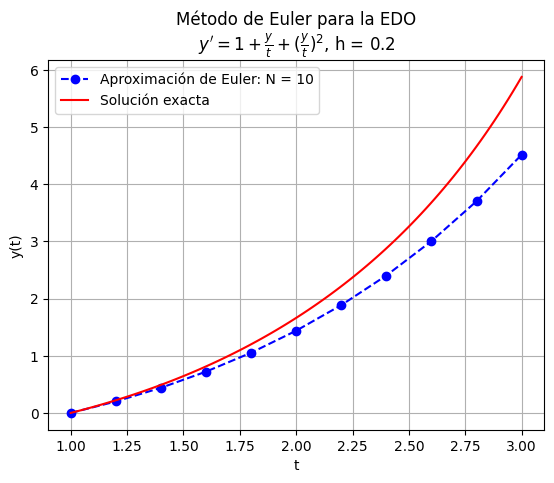

In [149]:
f = lambda t, y: 1 + y / t + (y / t) ** 2

exact_sol = lambda t: t * np.tan(np.log(t))

a, b = 1, 3
y_t0 = 0
N = 10

ys, ts, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)

t_exact = np.linspace(a, b, 100)
y_exact = exact_sol(t_exact)

plt.plot(
    ts,
    ys,
    label="Aproximación de Euler: N = 10",
    marker="o",
    linestyle="--",
    color="blue",
)
plt.plot(t_exact, y_exact, label="Solución exacta", linestyle="-", color="red")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title(
    "Método de Euler para la EDO\n$y' = 1 + \\frac{y}{t} + (\\frac{y}{t})^2$,"
    + f" h = {h}"
)
plt.legend()
plt.grid()
plt.show()

**Error Real**

In [150]:
error = np.abs(exact_sol(ts) - ys)

results = pd.DataFrame(
    {"t_i": ts, "ŷ_i": ys, "y_i = y(t_i)": exact_sol(ts), "|y_i - ŷ_i|": error}
)

print(results)

    t_i       ŷ_i  y_i = y(t_i)  |y_i - ŷ_i|
0   1.0  0.000000      0.000000     0.000000
1   1.2  0.200000      0.221243     0.021243
2   1.4  0.438889      0.489682     0.050793
3   1.6  0.721243      0.812753     0.091510
4   1.8  1.052038      1.199439     0.147401
5   2.0  1.437251      1.661282     0.224031
6   2.2  1.884261      2.213502     0.329241
7   2.4  2.402270      2.876551     0.474282
8   2.6  3.002837      3.678475     0.675638
9   2.8  3.700601      4.658665     0.958064
10  3.0  4.514277      5.874100     1.359823


**Interpolación Lineal**

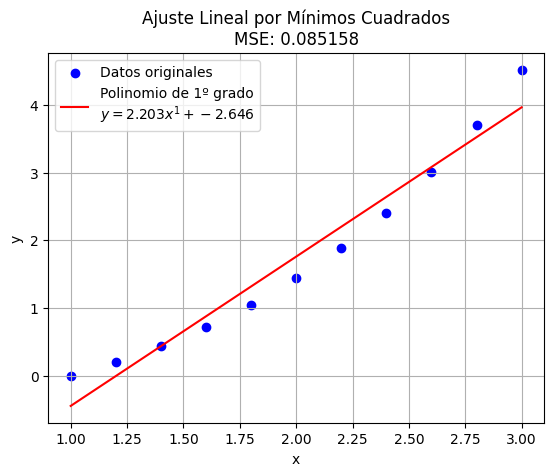

In [151]:
a, b = ajuste_polinomio(ts, ys, 1, "Lineal")

**1. $y(2.1)$**

In [152]:
x = 2.1

y_exact = exact_sol(x)

y_interpolate = f_lineal_interpolate(a, b, x)

print(f"Valor exacto en x = {x}: y = {y_exact:.6f}")
print(f"Valor interpolado en x = {x}: ŷ = {y_interpolate:.6f}")
print(f"Error absoluto: |y - ŷ| = {abs(y_exact - y_interpolate):.6f}")

Valor exacto en x = 2.1: y = 1.924962
Valor interpolado en x = 2.1: ŷ = 1.979697
Error absoluto: |y - ŷ| = 0.054735


**1. $y(2.75)$**

In [153]:
x = 2.75

y_exact = exact_sol(x)

y_interpolate = f_lineal_interpolate(a, b, x)

print(f"Valor exacto en x = {x}: y = {y_exact:.6f}")
print(f"Valor interpolado en x = {x}: ŷ = {y_interpolate:.6f}")
print(f"Error absoluto: |y - ŷ| = {abs(y_exact - y_interpolate):.6f}")

Valor exacto en x = 2.75: y = 4.394170
Valor interpolado en x = 2.75: ŷ = 3.411467
Error absoluto: |y - ŷ| = 0.982703


**c.**

$$y' = - (y + 1) (y + 3)$$
$$0 \leq t \leq 2$$
$$y(0) = -2$$
$$h = 0.2$$

**Solución**

$$y(t) = -3 + \frac{2}{1 + e^{-2t}}$$

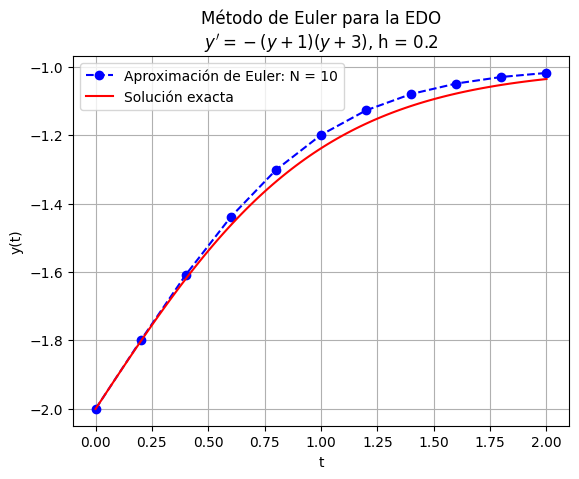

In [164]:
f = lambda t, y: - (y + 1) * (y + 3)

exact_sol = lambda t: - 3 + 2 / (1 + np.exp(- 2 * t))

a, b = 0, 2
y_t0 = -2
N = 10

ys, ts, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)

t_exact = np.linspace(a, b, 100)
y_exact = exact_sol(t_exact)

plt.plot(
    ts,
    ys,
    label="Aproximación de Euler: N = 10",
    marker="o",
    linestyle="--",
    color="blue",
)
plt.plot(t_exact, y_exact, label="Solución exacta", linestyle="-", color="red")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Método de Euler para la EDO\n$y' = - (y + 1) (y + 3)$," + f" h = {h}")
plt.legend()
plt.grid()
plt.show()

**Error Real**

In [165]:
ts = np.array(ts)
error = np.abs(exact_sol(ts) - ys)

results = pd.DataFrame(
    {"t_i": ts, "ŷ_i": ys, "y_i = y(t_i)": exact_sol(ts), "|y_i - ŷ_i|": error}
)

print(results)

    t_i       ŷ_i  y_i = y(t_i)  |y_i - ŷ_i|
0   0.0 -2.000000     -2.000000     0.000000
1   0.2 -1.800000     -1.802625     0.002625
2   0.4 -1.608000     -1.620051     0.012051
3   0.6 -1.438733     -1.462950     0.024218
4   0.8 -1.301737     -1.335963     0.034226
5   1.0 -1.199251     -1.238406     0.039155
6   1.2 -1.127491     -1.166345     0.038854
7   1.4 -1.079745     -1.114648     0.034903
8   1.6 -1.049119     -1.078331     0.029212
9   1.8 -1.029954     -1.053194     0.023240
10  2.0 -1.018152     -1.035972     0.017821


**Interpolación Lineal**

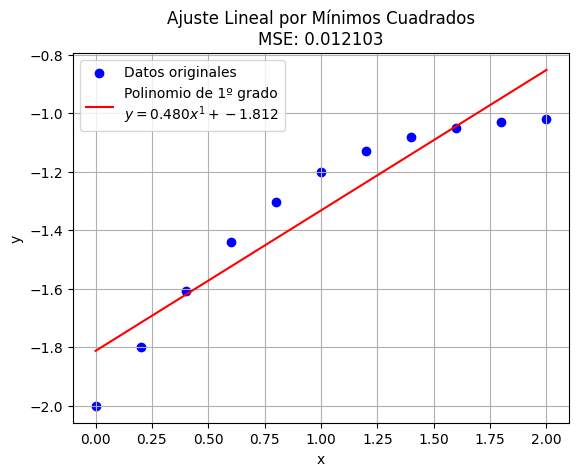

In [166]:
a, b = ajuste_polinomio(ts, ys, 1, "Lineal")

**1. $y(1.3)$**

In [167]:
x = 1.3

y_exact = exact_sol(x)

y_interpolate = f_lineal_interpolate(a, b, x)

print(f"Valor exacto en x = {x}: y = {y_exact:.6f}")
print(f"Valor interpolado en x = {x}: ŷ = {y_interpolate:.6f}")
print(f"Error absoluto: |y - ŷ| = {abs(y_exact - y_interpolate):.6f}")

Valor exacto en x = 1.3: y = -1.138277
Valor interpolado en x = 1.3: ŷ = -1.188040
Error absoluto: |y - ŷ| = 0.049763


**2. $y(1.93)$**

In [158]:
x = 1.93

y_exact = exact_sol(x)

y_interpolate = f_lineal_interpolate(a, b, x)

print(f"Valor exacto en x = {x}: y = {y_exact:.6f}")
print(f"Valor interpolado en x = {x}: ŷ = {y_interpolate:.6f}")
print(f"Error absoluto: |y - ŷ| = {abs(y_exact - y_interpolate):.6f}")

Valor exacto en x = 1.93: y = -1.041267
Valor interpolado en x = 1.93: ŷ = -0.885689
Error absoluto: |y - ŷ| = 0.155578


**d.**

$$y' = - 5y + 5t^2 + 2t$$
$$0 \leq t \leq 1$$
$$y(0) = \frac{1}{3}$$
$$h = 0.1$$

**Solución**

$$y(t) = t^2 + \frac{1}{3} e^{-5t}$$

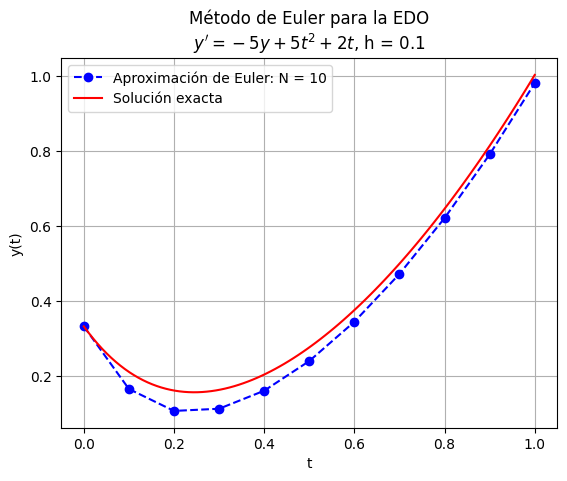

In [159]:
f = lambda t, y: -5 * y + 5 * t**2 + 2 * t

exact_sol = lambda t: t**2 + (1 / 3) * np.exp(-5 * t)

a, b = 0, 1
y_t0 = 1 / 3
N = 10

ys, ts, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)

t_exact = np.linspace(a, b, 100)
y_exact = exact_sol(t_exact)

plt.plot(
    ts,
    ys,
    label="Aproximación de Euler: N = 10",
    marker="o",
    linestyle="--",
    color="blue",
)
plt.plot(t_exact, y_exact, label="Solución exacta", linestyle="-", color="red")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title(f"Método de Euler para la EDO\n$y' = -5y + 5t^2 + 2t$, h = {h}")
plt.legend()
plt.grid()
plt.show()

**Error Real**

In [160]:
ts = np.array(ts)
error = np.abs(exact_sol(ts) - ys)

results = pd.DataFrame(
    {"t_i": ts, "ŷ_i": ys, "y_i = y(t_i)": exact_sol(ts), "|y_i - ŷ_i|": error}
)

print(results)

    t_i       ŷ_i  y_i = y(t_i)  |y_i - ŷ_i|
0   0.0  0.333333      0.333333     0.000000
1   0.1  0.166667      0.212177     0.045510
2   0.2  0.108333      0.162626     0.054293
3   0.3  0.114167      0.164377     0.050210
4   0.4  0.162083      0.205112     0.043028
5   0.5  0.241042      0.277362     0.036320
6   0.6  0.345521      0.376596     0.031075
7   0.7  0.472760      0.500066     0.027305
8   0.8  0.621380      0.646105     0.024725
9   0.9  0.790690      0.813703     0.023013
10  1.0  0.980345      1.002246     0.021901


**Interpolación Lineal**

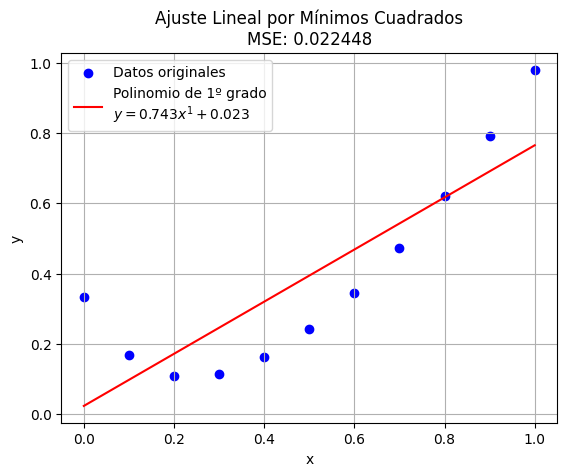

In [161]:
a, b = ajuste_polinomio(ts, ys, 1, "Lineal")

**1. $y(0.54)$**

In [162]:
x = 0.54

y_exact = exact_sol(x)

y_interpolate = f_lineal_interpolate(a, b, x)

print(f"Valor exacto en x = {x}: y = {y_exact:.6f}")
print(f"Valor interpolado en x = {x}: ŷ = {y_interpolate:.6f}")
print(f"Error absoluto: |y - ŷ| = {abs(y_exact - y_interpolate):.6f}")

Valor exacto en x = 0.54: y = 0.314002
Valor interpolado en x = 0.54: ŷ = 0.423923
Error absoluto: |y - ŷ| = 0.109922


**2. $y(0.94)$**

In [163]:
x = 0.94

y_exact = exact_sol(x)

y_interpolate = f_lineal_interpolate(a, b, x)

print(f"Valor exacto en x = {x}: y = {y_exact:.6f}")
print(f"Valor interpolado en x = {x}: ŷ = {y_interpolate:.6f}")
print(f"Error absoluto: |y - ŷ| = {abs(y_exact - y_interpolate):.6f}")

Valor exacto en x = 0.94: y = 0.886632
Valor interpolado en x = 0.94: ŷ = 0.721048
Error absoluto: |y - ŷ| = 0.165584


**GitHub:** [Tarea12 - @mateobtw18](https://github.com/mateobtw18/Tarea_12)

In [ ]:
# ####################################################################
def inv_matrix(A: np.ndarray) -> np.ndarray:
    """Inversión de una matriz cuadrada mediante método de Gauss-Jordan.
    ## Parameters
    ``A``: matriz cuadrada de tamaño n x n.

    ## Return
    ``A_inv``: matriz inversa de A.
    """
    if not isinstance(A, np.ndarray):
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz debe ser cuadrada."

    A = A.astype(float)
    I = np.eye(n)
    AI = np.hstack((A, I))

    for i in range(n):
        # Pivoteo parcial
        if AI[i, i] == 0:
            for j in range(i + 1, n):
                if AI[j, i] != 0:
                    AI[[i, j]] = AI[[j, i]]  # Intercambio de filas
                    break
            else:
                raise ValueError("La matriz no es invertible.")

        # Hacer el pivote igual a 1
        pivot = AI[i, i]
        AI[i] = AI[i] / pivot

        # Hacer ceros en la columna i
        for j in range(n):
            if i != j:
                factor = AI[j, i]
                AI[j] -= factor * AI[i]

    # La parte derecha de la matriz aumentada ahora es la inversa de A
    return AI[:, n:]